In [3]:
# 라이브러리 호출
import pandas as pd
import numpy as np

In [47]:
# CSV 파일 불러오기
df = pd.read_csv("COVID19.csv", encoding = 'cp949')
df.head()

# Columns 이름 변경
# df.rename()
df.columns = ['Category', 'Type', 'Date', 'Headcount', 'Unnamed']
print(type(df['Date'][0]))

# Date열 타입 변경
df['Date'] = pd.to_datetime(df['Date'])
print(type(df['Date'][0]))

# Date열 index 지정
df = df.set_index('Date')
df.head()

# NaN 열 삭제
# df.drop(['Unnamed'], axis = 1, inplace = True)
df = df.drop(['Unnamed'], axis = 1)
df.head()

# 결측치 확인
df.isna().sum()
df.isnull().sum()
len(df[df.isna().any(axis = 1)])

# 결측치 처리 
# 결측치가 존재하는 행 삭제
df = df.dropna(axis = 0)
df.isna().sum()

df

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Category,Type,Headcount
Date,,,
2020-04-09,전체,신규,39.0
2020-04-10,전체,신규,27.0
2020-04-11,전체,신규,30.0
2020-04-12,전체,신규,32.0
2020-04-13,전체,신규,25.0
...,...,...,...
2021-02-05,검역,신규,7.0
2021-02-06,검역,신규,11.0
2021-02-07,검역,신규,27.0


In [34]:
# 문제 1.총 확진자 수

df['Headcount'].sum()

279925.0

In [42]:
# 문제 2.'Category' 별, 'Type' 별 인원수를 확인

group_cate = df.groupby('Category')
print(group_cate['Headcount'].sum())

group_type = df.groupby('Type')
print(group_type['Headcount'].sum())

Category
0-9세       2956.0
10-19세     4725.0
20-29세     9253.0
30-39세     9001.0
40-49세    10022.0
50-59세    12872.0
60-69세    11070.0
70-79세     5355.0
80세 이상     3439.0
강원         1694.0
검역         2592.0
경기        20186.0
경남         1964.0
경북         1757.0
광주         1881.0
남성        34736.0
대구         1626.0
대전         1089.0
부산         2779.0
서울        24813.0
세종          154.0
여성        33982.0
울산          909.0
인천         3919.0
전남          752.0
전북         1045.0
전체        71255.0
제주          529.0
충남         1993.0
충북         1577.0
Name: Headcount, dtype: float64
Type
신규    279925.0
Name: Headcount, dtype: float64


In [57]:
# 문제 3.년도 별로 데이터프레임을 분리
df_2020 = df.loc['2020']
df_2021 = df.loc['2021']
df_Dec = df.loc['2020-12-01':'2020-12-31']

year_df = df.resample('Y')
'''
for i in year_df :
    print(i)
    '''
[print(i) for i in year_df]

df_2020
df_Dec

(Timestamp('2020-12-31 00:00:00', freq='A-DEC'),            Category Type  Headcount
Date                               
2020-04-09       전체   신규       39.0
2020-04-09       남성   신규       22.0
2020-04-09       여성   신규       17.0
2020-04-09     0-9세   신규        2.0
2020-04-09   10-19세   신규        4.0
...             ...  ...        ...
2020-12-31       전남   신규        5.0
2020-12-31       경북   신규       23.0
2020-12-31       경남   신규       22.0
2020-12-31       제주   신규        9.0
2020-12-31       검역   신규       13.0

[7900 rows x 3 columns])
(Timestamp('2021-12-31 00:00:00', freq='A-DEC'),            Category Type  Headcount
Date                               
2021-01-01       전체   신규     1029.0
2021-01-01       남성   신규      557.0
2021-01-01       여성   신규      472.0
2021-01-01     0-9세   신규       41.0
2021-01-01   10-19세   신규       74.0
...             ...  ...        ...
2021-02-09       전남   신규        0.0
2021-02-09       경북   신규        5.0
2021-02-09       경남   신규        7.0
2021-02-09  

,Category,Type,Headcount
Date,,,
2020-12-01,전체,신규,451.0
2020-12-02,전체,신규,511.0
2020-12-03,전체,신규,540.0
2020-12-04,전체,신규,629.0
2020-12-05,전체,신규,583.0
...,...,...,...
2020-12-27,검역,신규,10.0
2020-12-28,검역,신규,8.0
2020-12-29,검역,신규,5.0


In [62]:
# 2020년도 통계 확인
df_2020.describe()

# 피벗 테이블 index, columns, values를 정해서 만들어준다.
pivot_table = df.pivot_table(index = 'Category', columns = 'Type', values = 'Headcount', aggfunc = 'max') 

# 교차일람표
cross_table = pd.crosstab(index = df['Category'], columns = df['Headcount']) 
cross_table

# 이상한 값 ('Headcount'의 -값) 처리하기
# 제외하고 선택하거나 삭제
df = df.loc[df['Headcount'] >= 0]  # 제외하고 선택
df

,Category,Type,Headcount
Date,,,
2020-04-09,전체,신규,39.0
2020-04-10,전체,신규,27.0
2020-04-11,전체,신규,30.0
2020-04-12,전체,신규,32.0
2020-04-13,전체,신규,25.0
...,...,...,...
2021-02-05,검역,신규,7.0
2021-02-06,검역,신규,11.0
2021-02-07,검역,신규,27.0


In [72]:
# 다운샘플링 
downSample_table = df.resample('M').sum(numeric_only = True)
downSample_table

,Headcount
Date,
2020-04-30,1526.0
2020-05-31,2726.0
2020-06-30,5046.0
2020-07-31,6100.0
2020-08-31,22568.0
2020-09-30,15460.0
2020-10-31,10574.0
2020-11-30,30916.0
2020-12-31,102063.0


<Axes: xlabel='Date'>

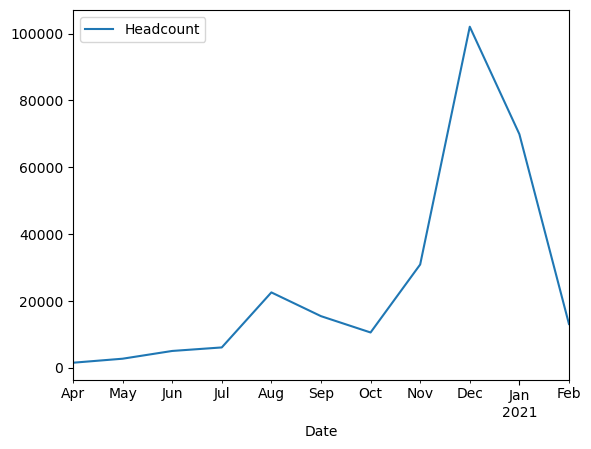

In [73]:
# pandas 간단 그래프 그리기

downSample_table.plot()

In [79]:
# 이동 평균 함수
# 값을 평평하게 만든다? 
# 일정한 주기의 값들을 평균을 만들어
rolling_mean = downSample_table['Headcount'].rolling(window = 3).mean()

rolling_mean

Date
2020-04-30             NaN
2020-05-31             NaN
2020-06-30     3099.333333
2020-07-31     4624.000000
2020-08-31    11238.000000
2020-09-30    14709.333333
2020-10-31    16200.666667
2020-11-30    18983.333333
2020-12-31    47851.000000
2021-01-31    67632.666667
2021-02-28    61696.333333
Freq: M, Name: Headcount, dtype: float64

<Axes: xlabel='Date'>

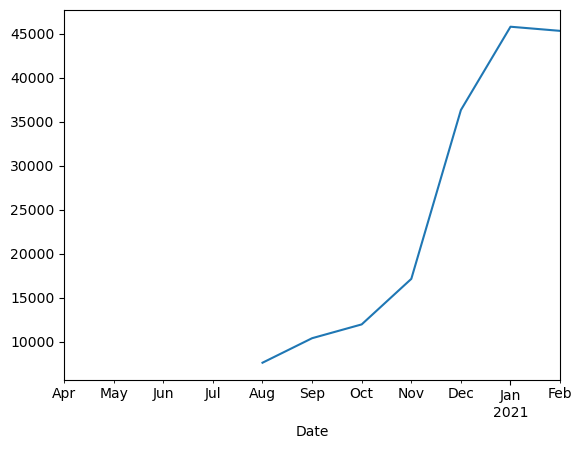

In [78]:
rolling_mean.plot()